# ***TELCO CHURN MODELLING***

The aim of this exercise is to build an artificial neural network model that can predict customer churn. Churn is a term used to describe when customers stop doing business with a company. In this case, we are looking at customer churn in the telecom industry.

The reason we are doing this exercise is because predicting customer churn is important for businesses to retain customers and increase profitability. By identifying customers who are likely to leave, companies can take proactive measures to keep them. An artificial neural network model can help identify patterns and trends in the data that might not be apparent through other methods, making it a useful tool for predicting churn.

## Here we will have all the necessary imports, these may be updated over time

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from keras.models import Sequential
from keras.layers import Dense

### Let us load the dataset we will be using

The dataset we will be using is from Kaggle  [Telco Repo](https://www.kaggle.com/blastchar/telco-customer-churn). The dataset has the following columns:


*   **customerID**: Unique identifier of every customer
*   **gender**: Customer is either Male/Female
*   **SeniorCitizen**: Customer is either a senior citizen or not (yes = 1, no = 0)
*   **Partner**: Customer has a partner (Yes/No)
*   **Dependents**: Customer either has dependents or no (Yes/No)
*   **tenure**: No of years the customer has been with the company
*   **PhoneService**: Whether the customer has a phone service or not (Yes/No)
*   **MultipleLines**: Whether the customer has multiple lines or not (Yes/No/No phone service)
*   **InternetService**: Customer’s internet service provider (DSL/Fiber optic/No)
*   **OnlineSecurity**: Whether the customer has online security or not (Yes/No/No internet service)
*   **OnlineBackup**: Whether the customer has online backup or not (Yes/No/No internet service)
*   **DeviceProtection**: Whether the customer has device protection or not (Yes/No/No internet service)
*   **TechSupport**: Whether the customer has tech support or not (Yes/No/No internet service)
*   **StreamingTV**: Whether the customer has streaming TV or not (Yes/No/No internet service)
*   **StreamingMovies**: Whether the customer has streaming movies or not (Yes/No/No internet service)
*   **Contract**: The contract term of the customer (Month-to-month/One year/Two year)
*   **PaperlessBilling**: Whether the customer has paperless billing or not (Yes/No)
*   **PaymentMethod**: The customer’s payment method (Electronic check/Mailed check/Bank transfer (automatic)/Credit card (automatic))
*   **MonthlyCharges**: The amount charged to the customer monthly
*   **TotalCharges**: The total amount charged to the customer
*   **Churn**: Target variable, whether the customer churned or not (Yes/No)





#### Here we will install kaggle, so we can access the dataset directly, you can also download the dataset and paste it into the root folder, I just enjoy working like this, personal preference

In [3]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### Mount your google drive with colab

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### makes a directory kaggle in the root folder, you might not see it, but it is there, do not worry, as long as the block runs

In [5]:
! mkdir ~/.kaggle

#### In these steps we want to link colab with kaggle



*   First go to your kaggle account
*   Create an api key, this will download a json file
*   Create a folder in your drive colab notebooks folder called "kaggle_api_credentials"
*   So you should have something like:
> MyDrive/ColabNotebooks/kaggle_api_credentials
*   Now paste the kaggle.json file in that folder
*   Copy the path of the kaggle.json file
*   Run the line:
> !cp "your path" ~/.kaggle/kaggle.json
*   You may note in mine that there is "Colab Notebooks" in inverted commas, it is because in my drive the folder is Colab Notebooks instead of ColabNotebooks, so the space between the characters might affect the cell, do be careful of that.



In [7]:
!cp /content/drive/MyDrive/"Colab Notebooks"/kaggle_api_credentials/kaggle.json ~/.kaggle/kaggle.json

##### This line just ensures that only you, as the author, have read and write rights to the kaggle.json file

In [8]:
! chmod 600 ~/.kaggle/kaggle.json

##### This line downloads the kaggle dataset, how this is derived is:



*   Choose the dataset you will work with, in our case we chose the Telco Customer Churn dataset by BLASTCHAR
*   You will note in the url of the dataset you have:
> https://www.kaggle.com/datasets/blastchar/telco-customer-churn
*   Here we take the last two items which are:
> blastchar/telco-customer-churn
*   Then we run the content on the following cell, you can use this method for all datasets you might work with at a later stage.



In [9]:
! kaggle datasets download blastchar/telco-customer-churn

  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 87.3MB/s]


##### Do note that the dataset is temporary downloaded as a zip file, the following cell extracts the csv file

In [10]:
! unzip telco-customer-churn.zip

Archive:  telco-customer-churn.zip
  inflating: WA_Fn-UseC_-Telco-Customer-Churn.csv  


##### Now we can use the dataset as a csv file and assign it to df. Do make sure you first check the file name.

In [11]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')


In [13]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


##### This cell shows you the information about the dataset, here you may see Non-Null counts, which shows you if there are missing values, the data type of each column

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##### This cell gives you a summary of the data, such as: number of rows, columns, data types, mean, standard deviation, min ,max. 

In [17]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


##### This cell shows you for each column if there are null values or not

In [18]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

##### This cell gives us a count of the number of customers who churned vs thos who did not

<Axes: xlabel='Churn', ylabel='count'>

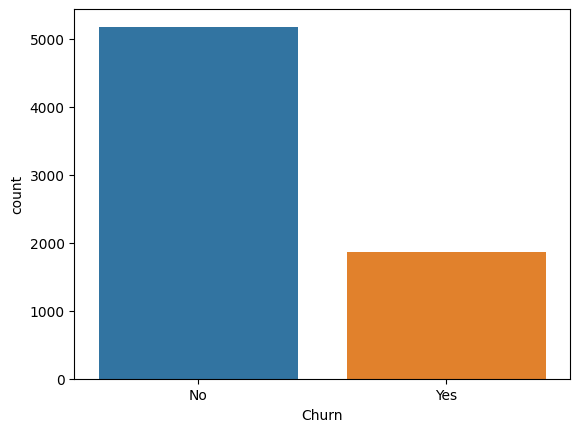

In [19]:
sns.countplot(x='Churn', data=df)

##### This cell gives us a pairplot to visualize the relationship between variables, with churn as the hue

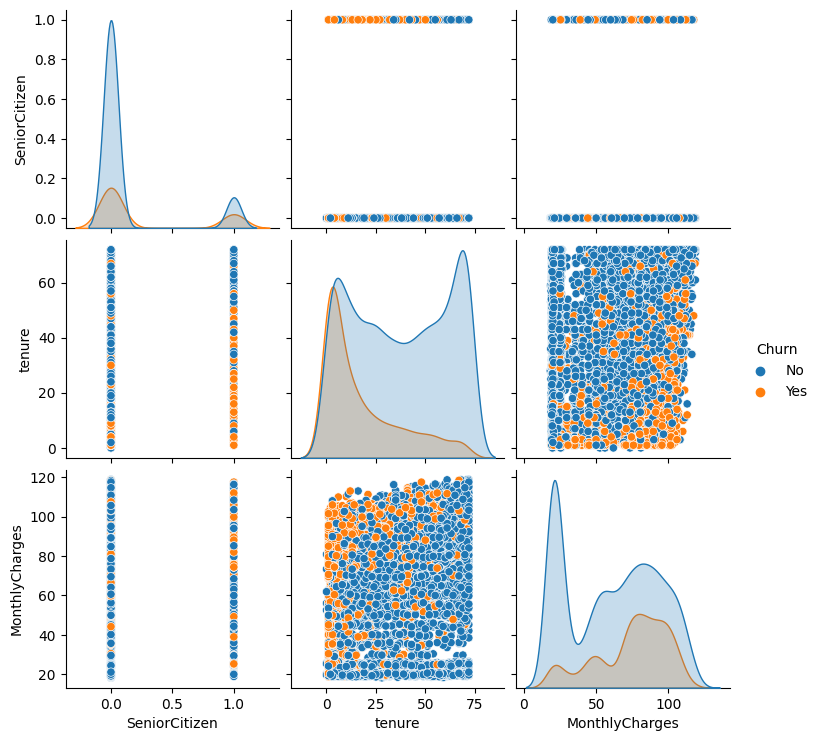

In [20]:
sns.pairplot(df, hue='Churn')

### Now we will begin to clean our data

In [21]:
# We will drop customerID as it serves no purpose in our modelling
df = df.drop('customerID', axis=1)

# Here we will convert the TotalCharges column to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Here we will fill in the missing values of TotalCharges with the mdeian, you can choose the mean, zero or drop the rows
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# Then here we will convert all categorical variables to dummy variables, we sometimes call this hot encoding
df = pd.get_dummies(df, drop_first=True)

In [22]:
df.head(10)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
5,0,8,99.65,820.50,0,0,0,1,0,1,...,1,0,1,0,0,1,0,1,0,1
6,0,22,89.10,1949.40,1,0,1,1,0,1,...,1,0,0,0,0,1,1,0,0,0
7,0,10,29.75,301.90,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
8,0,28,104.80,3046.05,0,1,0,1,0,1,...,1,0,1,0,0,1,0,1,0,1
9,0,62,56.15,3487.95,1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [23]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928,0.504756,0.483033,0.299588,0.903166,0.096834,0.421837,...,0.384353,0.216669,0.387903,0.209144,0.240664,0.592219,0.216101,0.335794,0.228880,0.265370
std,0.368612,24.559481,30.090047,2265.270398,0.500013,0.499748,0.458110,0.295752,0.295752,0.493888,...,0.486477,0.412004,0.487307,0.406726,0.427517,0.491457,0.411613,0.472301,0.420141,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,402.225000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   float64
 4   gender_Male                            7043 non-null   uint8  
 5   Partner_Yes                            7043 non-null   uint8  
 6   Dependents_Yes                         7043 non-null   uint8  
 7   PhoneService_Yes                       7043 non-null   uint8  
 8   MultipleLines_No phone service         7043 non-null   uint8  
 9   MultipleLines_Yes                      7043 non-null   uint8  
 10  InternetService_Fiber optic            7043 non-null   uint8  
 11  Inte

#### Now we will split the data

In [25]:
# This will the data into features and target
X = df.drop('Churn_Yes', axis=1)
y = df['Churn_Yes']

# Now we will split the data into training and testing sets
# Training set will be 80% and testing set will be 20%
X_train, Xtest, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### We will now scale our data, instead of values like 23000 for total charges, we want to have values between 0 and 1

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(Xtest)

In [28]:
X_train

array([[-4.37749204e-01, -4.65683364e-01, -4.73723375e-04, ...,
        -5.27655848e-01, -7.09649831e-01,  1.84247002e+00],
       [-4.37749204e-01,  8.85536787e-01,  1.07475386e+00, ...,
        -5.27655848e-01, -7.09649831e-01, -5.42749671e-01],
       [-4.37749204e-01, -1.28460467e+00, -1.37649913e+00, ...,
        -5.27655848e-01,  1.40914569e+00, -5.42749671e-01],
       ...,
       [-4.37749204e-01, -8.34197950e-01, -1.45294499e+00, ...,
        -5.27655848e-01,  1.40914569e+00, -5.42749671e-01],
       [ 2.28441306e+00, -8.34197950e-01,  1.14953785e+00, ...,
        -5.27655848e-01,  1.40914569e+00, -5.42749671e-01],
       [-4.37749204e-01, -2.60953038e-01, -1.49781538e+00, ...,
         1.89517467e+00, -7.09649831e-01, -5.42749671e-01]])

### Here we will define the function that will create our model, our model will be basic, this can be updated and tweaked for your preference, to make the model suitable for you. In our we have:



*   It has 3 layers, the input layer, hidden layer and an output layer
*   Input layer has 64 Nodes with an activation of relu
*   Hidden layer has 32 Nodes with an activation of relu
*   Output layer has 1 Node, since we want to compute if the customer churned or not with an activation of sigmoid
*   You can read more about activation functions on [Activation functions](https://www.tensorflow.org/api_docs/python/tf/keras/activations)
*   When compiling our function we have the loss function binary_crossentropy, you can also read up on loss function on [Loss functions](https://www.tensorflow.org/api_docs/python/tf/keras/losses)
*    Then we want our metrics to be accuracy so we can evaluate our model
*    Then we will return our model.


In [76]:
def ANN_Model(input_shape):
  input_shape = (input_shape,)
  model = Sequential([
      Dense(128, input_shape=input_shape, activation='relu'),
      Dense(64, activation='relu'),
      Dense(32, activation='relu'),
      Dense(16, activation='relu'),
      Dense(1, activation='sigmoid')
  ])

  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

#### Here we will train our model, always start with a lower epochs number to see how your model behaves, the go for a higher number, I started with 10, then went gradually to 100. 

In [77]:
# Create the model
model = ANN_Model(input_shape=X_train.shape[1])


In [78]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 128)               3968      
                                                                 
 dense_22 (Dense)            (None, 64)                8256      
                                                                 
 dense_23 (Dense)            (None, 32)                2080      
                                                                 
 dense_24 (Dense)            (None, 16)                528       
                                                                 
 dense_25 (Dense)            (None, 1)                 17        
                                                                 
Total params: 14,849
Trainable params: 14,849
Non-trainable params: 0
_________________________________________________________________


In [80]:
# Train the model on the training data
epochs = 10
batch_size = 64
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/10
89/89 [==============================] - 0s 2ms/step - loss: 0.1145 - accuracy: 0.9483 - val_loss: 1.3190 - val_accuracy: 0.7715
Epoch 2/10
89/89 [==============================] - 0s 2ms/step - loss: 0.1091 - accuracy: 0.9487 - val_loss: 1.4350 - val_accuracy: 0.7757
Epoch 3/10
89/89 [==============================] - 0s 2ms/step - loss: 0.1090 - accuracy: 0.9510 - val_loss: 1.4231 - val_accuracy: 0.7736
Epoch 4/10
89/89 [==============================] - 0s 3ms/step - loss: 0.1046 - accuracy: 0.9498 - val_loss: 1.4264 - val_accuracy: 0.7651
Epoch 5/10
89/89 [==============================] - 0s 2ms/step - loss: 0.1067 - accuracy: 0.9503 - val_loss: 1.4760 - val_accuracy: 0.7693
Epoch 6/10
89/89 [==============================] - 0s 3ms/step - loss: 0.1099 - accuracy: 0.9492 - val_loss: 1.4421 - val_accuracy: 0.7587
Epoch 7/10
89/89 [==============================] - 0s 2ms/step - loss: 0.1081 - accuracy: 0.9483 - val_loss: 1.4860 - val_accuracy: 0.7615
Epoch 8/10
89/89 [==

### Now let us evaluate our model on the testing data

In [81]:
loss, accuracy = model.evaluate(X_test, y_test)

print(f"Test accuracy: {accuracy}, Loss: {loss}")

45/45 [==============================] - 0s 1ms/step - loss: 1.4314 - accuracy: 0.7771
Test accuracy: 0.7771469354629517, Loss: 1.431447982788086


#### Here we will Visualize the model perfomance

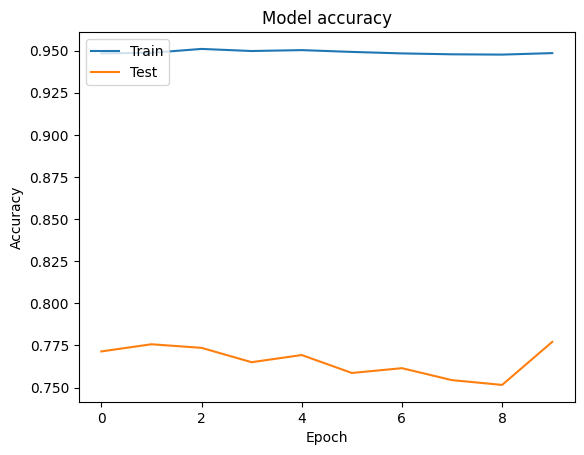

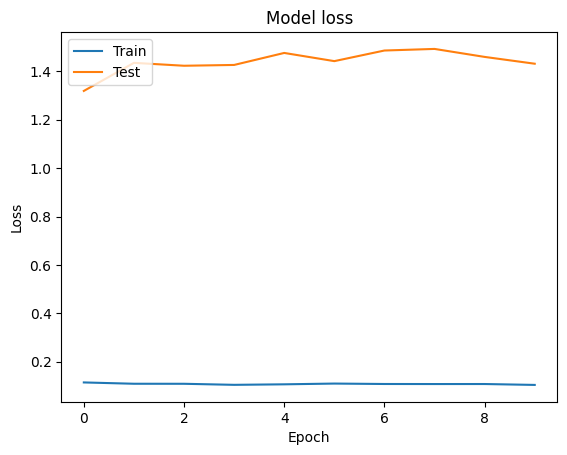

In [82]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [83]:
# Make predictions on the test data
y_pred = model.predict(X_test)

45/45 [==============================] - 0s 938us/step


In [84]:
y_pred = (y_pred > 0.5).astype(int)

In [85]:
y_pred = y_pred.flatten()
y_pred.shape

(1409,)

In [86]:
y_pred

array([1, 0, 0, ..., 0, 0, 1])

In [87]:
print(confusion_matrix(y_test, y_pred))

[[873 163]
 [151 222]]


In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1036
           1       0.58      0.60      0.59       373

    accuracy                           0.78      1409
   macro avg       0.71      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



Text(50.722222222222214, 0.5, 'Actual')

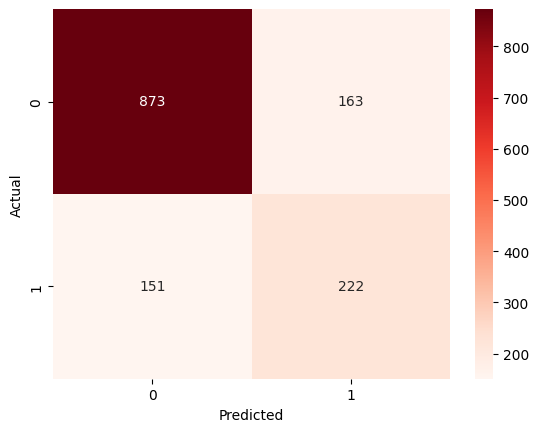

In [89]:
ax = sns.heatmap(confusion_matrix(y_test, y_pred), fmt='g', annot=True, cmap="Reds")

ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")